In [ ]:
from google.colab import files
uploaded = files.upload()

Saving csv_result-PersonalitySwipes_full (1).csv to csv_result-PersonalitySwipes_full (1).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
ds=pd.read_csv('/content/csv_result-PersonalitySwipes_full (1).csv')
print(ds)
ds.describe()

        id  questionid  touchexperience  answer  ...   P  L  EN  userid
0        1           1                5       0  ...  20  4   1       1
1        2           2                5       1  ...  20  4   1       1
2        3           3                5       1  ...  20  4   1       1
3        4           4                5       1  ...  20  4   1       1
4        5           5                5       0  ...  20  4   1       1
...    ...         ...              ...     ...  ...  .. ..  ..     ...
5679  5680          54                4       0  ...  16  6   4     422
5680  5681          55                4       0  ...  16  6   4     422
5681  5682          56                4       0  ...  16  6   4     422
5682  5683          57                4       1  ...  16  6   4     422
5683  5684          58                4       0  ...  16  6   4     422

[5684 rows x 22 columns]


,id,questionid,touchexperience,answer,answerpercent,duration,length_of_trajectory,average_velocity,accelerationatstart,midstrokenpressure,midstrokefingerarea,meanpressure,meanfingerarea,meangx,meangy,meangz,E,N,P,L,EN,userid
count,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000,5684.000000
mean,2842.500000,29.500000,3.867347,0.576003,70.368578,629.638987,312.284445,0.785409,0.001866,0.513090,0.308183,0.436751,0.300637,0.080275,4.704145,7.435069,17.897959,22.897959,20.632653,5.387755,2.010204,195.622449
std,1640.973796,16.742142,1.139718,0.494233,29.684886,729.950591,175.086166,0.576789,0.024381,0.231346,0.097595,0.183952,0.084146,1.068598,3.304332,2.578949,8.434747,8.142934,5.311964,2.776355,1.129438,155.567306
min,1.000000,1.000000,1.000000,0.000000,0.000000,69.000000,3.386649,0.013905,-0.745245,0.057600,0.032258,0.070400,0.109677,-5.592955,-3.788495,-9.430910,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000
25%,1421.750000,15.000000,3.000000,0.000000,44.000000,290.000000,196.233945,0.289622,0.000000,0.350400,0.225806,0.301890,0.240143,-0.422385,2.481851,6.569833,12.000000,16.000000,16.000000,4.000000,1.000000,32.000000
50%,2842.500000,29.500000,4.000000,1.000000,84.000000,447.000000,360.464385,0.657097,0.000606,0.494400,0.290323,0.406080,0.290323,0.162847,5.532712,7.959692,18.000000,22.000000,22.000000,6.000000,2.000000,205.500000
75%,4263.250000,44.000000,5.000000,1.000000,97.000000,717.000000,398.799835,1.173347,0.005302,0.662400,0.354839,0.540343,0.346774,0.618537,7.144040,9.286164,24.000000,30.000000,24.000000,8.000000,3.000000,319.000000
max,5684.000000,58.000000,5.000000,1.000000,101.000000,18262.000000,5101.321010,3.540814,0.519070,1.000000,1.000000,1.135200,0.754839,4.827444,9.788335,9.806500,32.000000,38.000000,30.000000,12.000000,4.000000,422.000000


In [ ]:
print("Shape:", ds.shape)
print("\nFeatures:", ds.columns)

# storing the feature matrix (X) and response vector (y)
y=ds[ds.columns[-1]]
x=ds[ds.columns[:-1]]
# printing first 5 rows of feature matrix
print("\nFeature matrix:\n", x.head())
# printing first 5 values of response vector
print("\nResponse vector:\n", y.head())

Shape: (5684, 22)

Features: Index(['id', 'questionid', 'touchexperience', 'answer', 'answerpercent',
       'duration', 'length_of_trajectory', 'average_velocity',
       'accelerationatstart', 'midstrokenpressure', 'midstrokefingerarea',
       'meanpressure', 'meanfingerarea', 'meangx', 'meangy', 'meangz', 'E',
       'N', 'P', 'L', 'EN', 'userid'],
      dtype='object')

Feature matrix:
    id  questionid  touchexperience  answer  answerpercent  ...   E   N   P  L  EN
0   1           1                5       0             96  ...  20  30  20  4   1
1   2           2                5       1             97  ...  20  30  20  4   1
2   3           3                5       1             95  ...  20  30  20  4   1
3   4           4                5       1             95  ...  20  30  20  4   1
4   5           5                5       0             55  ...  20  30  20  4   1

[5 rows x 21 columns]

Response vector:
 0    1
1    1
2    1
3    1
4    1
Name: userid, dtype: int64


**Holdout validation**

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# printing the shapes of the new X objects
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

# printing the shapes of the new y objects
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (4547, 21)
x_test shape:  (1137, 21)
y_train shape:  (4547,)
y_test shape:  (1137,)


**Normalizing the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Local Outlier factor(LOF)**

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(x,metric="manhattan") # to check the distances

array([[   0.      ,  233.020747,  351.147556, ..., 6136.67484 ,
        6265.368405, 6189.065471],
       [ 233.020747,    0.      ,  120.191809, ..., 5908.191059,
        6034.884624, 5963.446776],
       [ 351.147556,  120.191809,    0.      , ..., 5815.114928,
        5938.846459, 5871.129719],
       ...,
       [6136.67484 , 5908.191059, 5815.114928, ...,    0.      ,
         129.278567,   58.513893],
       [6265.368405, 6034.884624, 5938.846459, ...,  129.278567,
           0.      ,   87.296608],
       [6189.065471, 5963.446776, 5871.129719, ...,   58.513893,
          87.296608,    0.      ]])

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = 7, novelty = True)
lof.fit(x_train)
decision = lof.decision_function(x_train)
prediction = lof.predict(x_test)
decision = lof.decision_function(x_test)
maxDistance = max(decision)
decision = decision /maxDistance
print("prediction:",prediction)
print("decision:",decision)


prediction: [1 1 1 ... 1 1 1]
decision: [0.8486048  0.89273975 0.84657217 ... 0.83098908 0.64049879 0.4759462 ]


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(max_iter=500,activation='relu')
mlp

MLPClassifier(max_iter=500)

In [ ]:
MLPModel=mlp.fit(x_train,y_train)
MLP_ACC=mlp.score(x_test,y_test)

In [ ]:
print(y_test.tolist())
print(MLPModel.predict(x_test).tolist())

[407, 413, 38, 11, 317, 212, 302, 303, 402, 302, 414, 312, 211, 1, 102, 110, 409, 402, 410, 29, 33, 309, 417, 4, 7, 203, 201, 27, 410, 417, 7, 18, 39, 201, 8, 402, 419, 311, 29, 41, 4, 31, 41, 103, 406, 34, 30, 103, 205, 422, 33, 7, 17, 8, 408, 5, 41, 301, 410, 403, 20, 9, 403, 41, 16, 306, 311, 301, 213, 6, 323, 404, 13, 103, 106, 15, 318, 201, 319, 320, 303, 210, 311, 209, 4, 318, 401, 404, 13, 107, 212, 202, 5, 37, 37, 308, 34, 109, 413, 38, 316, 16, 29, 404, 419, 409, 8, 35, 4, 40, 409, 406, 401, 415, 203, 323, 38, 309, 101, 29, 38, 307, 10, 413, 16, 103, 416, 104, 32, 417, 29, 106, 1, 206, 14, 419, 302, 7, 418, 16, 1, 29, 313, 12, 322, 106, 319, 210, 402, 17, 41, 402, 10, 305, 14, 410, 205, 3, 105, 305, 301, 417, 323, 304, 109, 203, 416, 416, 301, 305, 6, 416, 30, 401, 4, 317, 13, 404, 302, 313, 6, 37, 401, 302, 12, 323, 37, 208, 105, 417, 408, 304, 13, 1, 302, 311, 35, 1, 403, 418, 401, 6, 310, 27, 19, 304, 306, 410, 18, 209, 105, 30, 103, 15, 322, 418, 31, 6, 19, 211, 313, 4, 30

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,MLPModel.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        15
          12       0.93      1.00      0.96        13
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00         7
          18       1.00      1.00      1.00        13
          19       1.00    

In [ ]:
print("MLP Accuracy: ",MLP_ACC*100)

MLP Accuracy:  99.56024626209323


**Box Plot**

In [ ]:
from tqdm import tqdm_notebook
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving visualize_swipe.csv to visualize_swipe.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
visualize=pd.read_csv('visualize_swipe.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Charts are being ready:   0%|          | 0/8 [00:00<?, ?it/s]

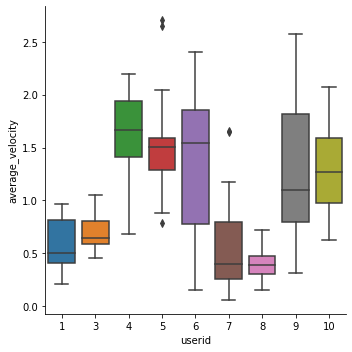

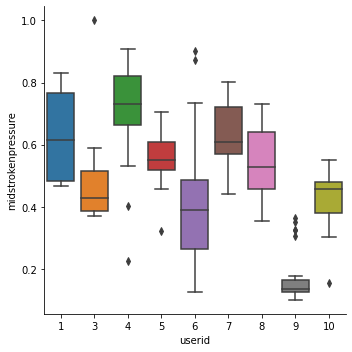

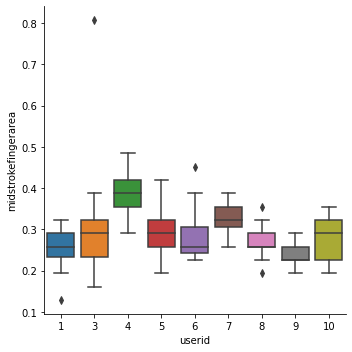

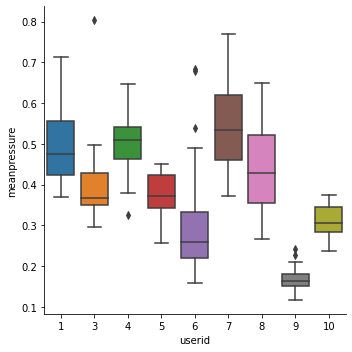

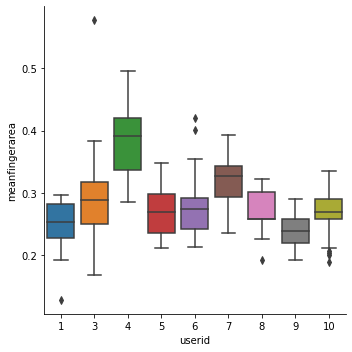

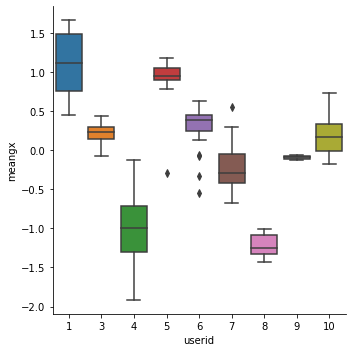

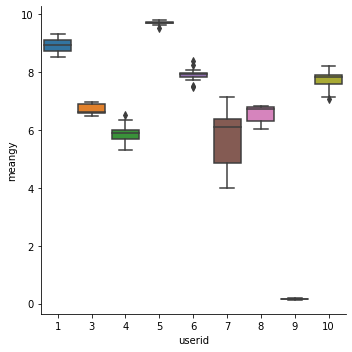

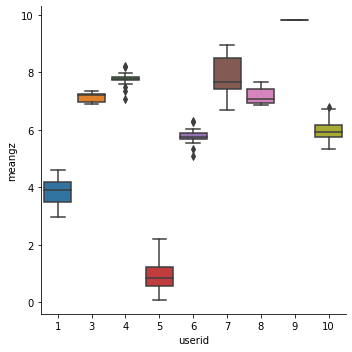

In [ ]:
#Visualizing boxplot
import seaborn as sns
cols = [
        'average_velocity','midstrokenpressure', 'midstrokefingerarea',
       'meanpressure', 'meanfingerarea', 'meangx', 'meangy', 'meangz']
def boxPlotter(ds, columnName):
    sns.catplot(x="userid", y=columnName, data=visualize, kind="box");
for column in tqdm_notebook(cols, desc = "Charts are being ready"):
    boxPlotter(ds, column)

#Visualizing piechart
def pieChartPlotter(visualize, columnName):
    values = visualize[columnName].value_counts()
    labels = visualize[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,explode=[0.06]*visualize[columnName].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

#pieChartPlotter(visualize, 'userid')

<BarContainer object of 3 artists>

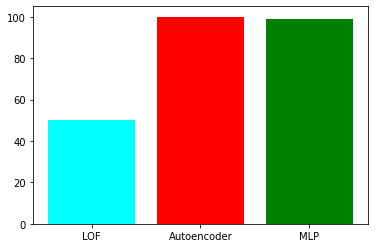

In [ ]:
import matplotlib.pyplot as plt
y=[50,100,99]
x=['LOF','Autoencoder','MLP']
plt.bar(x,y,color=['cyan','red','green','blue'])